# import needed libraries

In [ ]:
import os
import PIL as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('modules loaded')

modules loaded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# read data

## train

In [ ]:
train_dir='/content/drive/MyDrive/archive (5)/Training'
filepath=[]
labels=[]
folds=os.listdir(train_dir)
for fold in folds:
    filpath=os.path.join(train_dir,fold)
    filelist=os.listdir(filpath)
    for f in filelist:
        fpath=os.path.join(filpath,f)
        filepath.append(fpath)
        labels.append(fold)
f_series=pd.Series(filepath,name='filepath')
l_series=pd.Series(labels,name='labels')
train_df=pd.concat([f_series,l_series],axis=1)

In [ ]:
train_df

,filepath,labels
0,/content/drive/MyDrive/archive (5)/Training/pi...,pituitary
1,/content/drive/MyDrive/archive (5)/Training/pi...,pituitary
2,/content/drive/MyDrive/archive (5)/Training/pi...,pituitary
3,/content/drive/MyDrive/archive (5)/Training/pi...,pituitary
4,/content/drive/MyDrive/archive (5)/Training/pi...,pituitary
...,...,...
5867,/content/drive/MyDrive/archive (5)/Training/no...,notumor
5868,/content/drive/MyDrive/archive (5)/Training/no...,notumor
5869,/content/drive/MyDrive/archive (5)/Training/no...,notumor
5870,/content/drive/MyDrive/archive (5)/Training/no...,notumor


## test

In [ ]:
dummy_dir='/content/drive/MyDrive/archive (5)/Testing'
filepath=[]
labels=[]
folds=os.listdir(dummy_dir)
for fold in folds:
    filpath=os.path.join(dummy_dir,fold)
    filelist=os.listdir(filpath)
    for f in filelist:
        fpath=os.path.join(filpath,f)
        filepath.append(fpath)
        labels.append(fold)
f_series=pd.Series(filepath,name='filepath')
l_series=pd.Series(labels,name='labels')
dummy_df=pd.concat([f_series,l_series],axis=1)

In [ ]:
dummy_df

,filepath,labels
0,/content/drive/MyDrive/archive (5)/Testing/gli...,glioma
1,/content/drive/MyDrive/archive (5)/Testing/gli...,glioma
2,/content/drive/MyDrive/archive (5)/Testing/gli...,glioma
3,/content/drive/MyDrive/archive (5)/Testing/gli...,glioma
4,/content/drive/MyDrive/archive (5)/Testing/gli...,glioma
...,...,...
1326,/content/drive/MyDrive/archive (5)/Testing/pit...,pituitary
1327,/content/drive/MyDrive/archive (5)/Testing/pit...,pituitary
1328,/content/drive/MyDrive/archive (5)/Testing/pit...,pituitary
1329,/content/drive/MyDrive/archive (5)/Testing/pit...,pituitary


# preprocessing

In [ ]:
count_train=train_df["labels"].value_counts()
count_train

notumor       1625
pituitary     1527
glioma        1361
meningioma    1359
Name: labels, dtype: int64

<ipython-input-8-e70d7917469c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_train.index,y=count_train.values,palette='viridis')


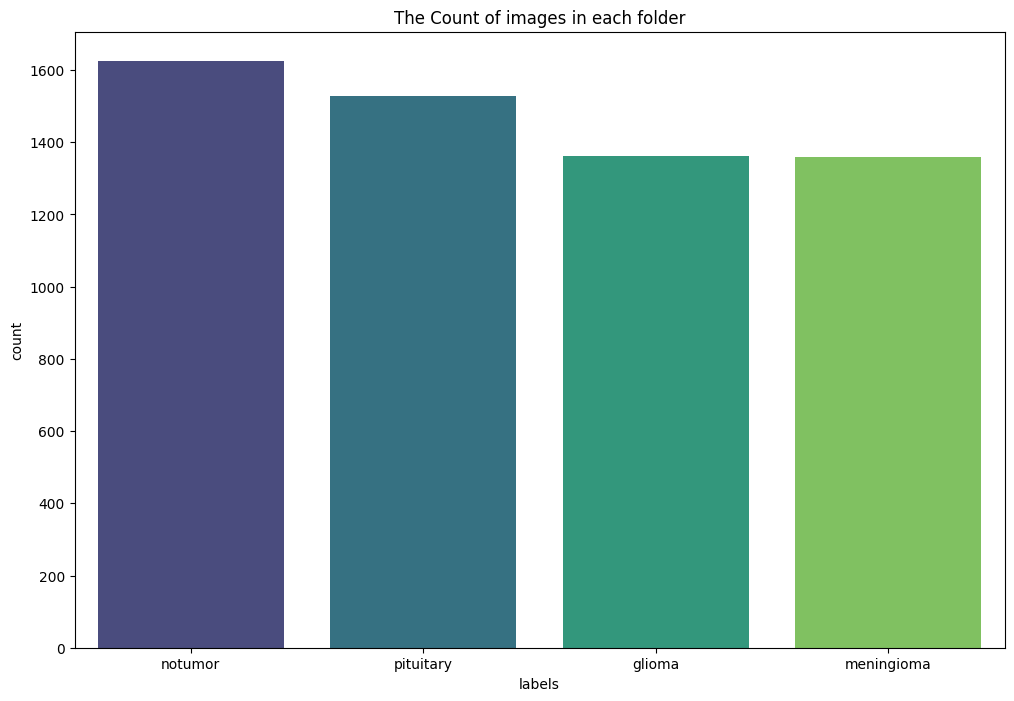

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_train.index,y=count_train.values,palette='viridis')
plt.title('The Count of images in each folder')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

In [ ]:
count_dummy=dummy_df["labels"].value_counts()
count_dummy

notumor       406
glioma        310
pituitary     309
meningioma    306
Name: labels, dtype: int64

<ipython-input-10-007b91dc778d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_dummy.index,y=count_dummy.values,palette='viridis')


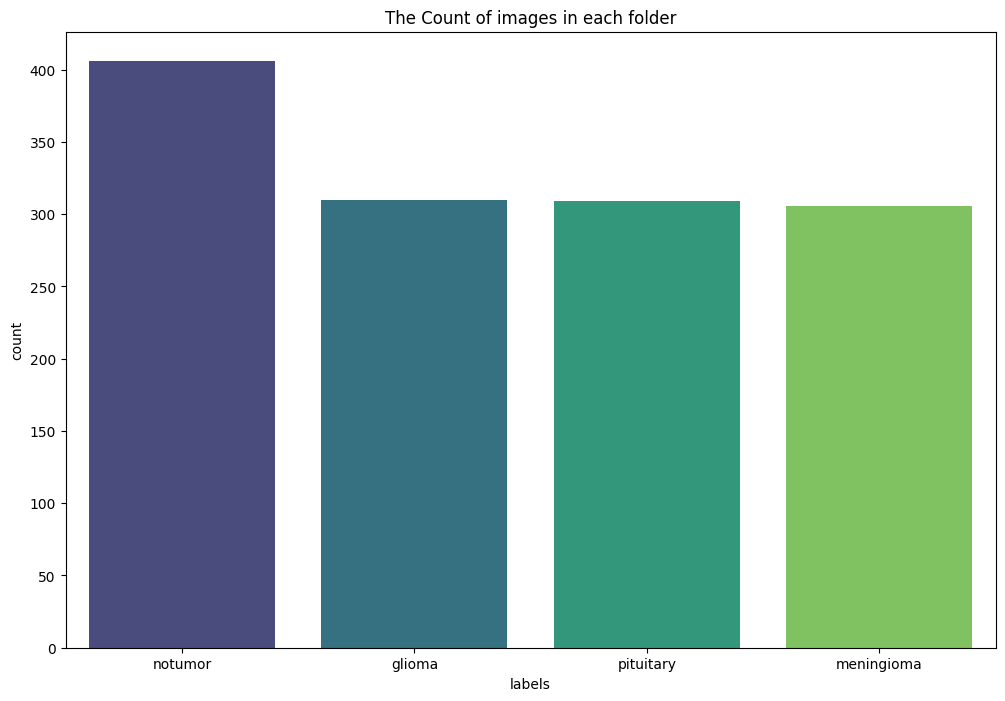

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_dummy.index,y=count_dummy.values,palette='viridis')
plt.title('The Count of images in each folder')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

# split dummy_df to test and valid

In [ ]:
valid_df,test_df=train_test_split(dummy_df,test_size=0.5,random_state=42,stratify=dummy_df['labels'])

# create image data generator

In [ ]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5872 validated image filenames belonging to 4 classes.
Found 665 validated image filenames belonging to 4 classes.
Found 666 validated image filenames belonging to 4 classes.


# sample from data

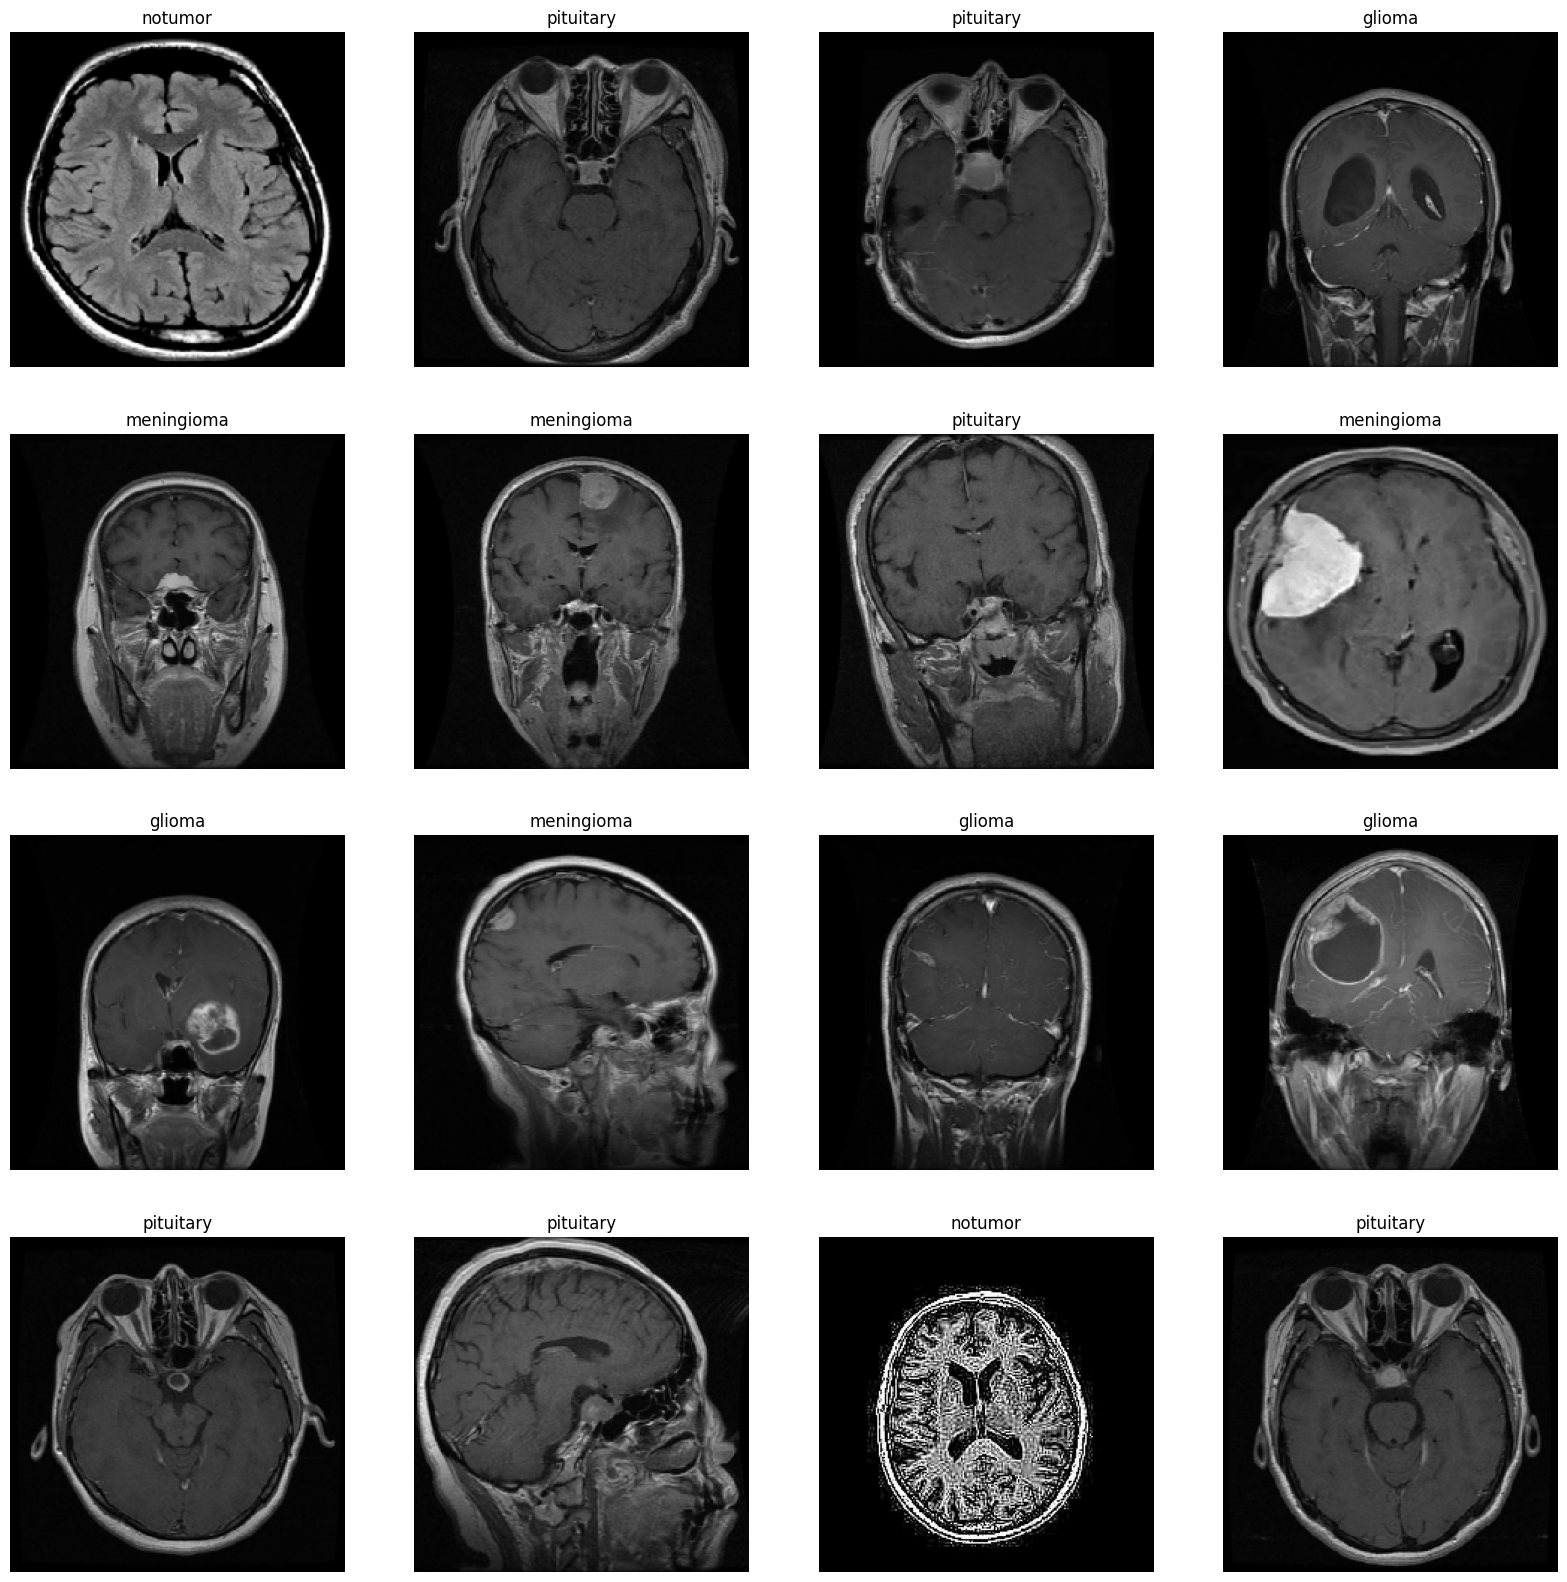

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

# Build model

In [ ]:
from keras.applications import VGG16

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom classification head
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21138500 (80.64 MB)
Trainable params: 6423812 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
__________

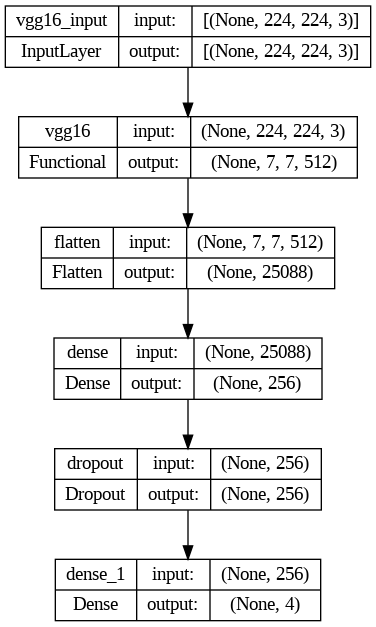

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,shuffle=False, validation_steps= None)

Epoch 1/10
367/367 [==============================] - 4051s 11s/step - loss: 1.4871 - accuracy: 0.8265 - val_loss: 0.4958 - val_accuracy: 0.8887
Epoch 2/10
367/367 [==============================] - 4013s 11s/step - loss: 0.3210 - accuracy: 0.9235 - val_loss: 0.3194 - val_accuracy: 0.9248
Epoch 3/10
367/367 [==============================] - 4035s 11s/step - loss: 0.1479 - accuracy: 0.9530 - val_loss: 0.2273 - val_accuracy: 0.9338
Epoch 4/10
367/367 [==============================] - 4010s 11s/step - loss: 0.0946 - accuracy: 0.9709 - val_loss: 0.1533 - val_accuracy: 0.9474
Epoch 5/10
  6/367 [..............................] - ETA: 58:29 - loss: 0.0136 - accuracy: 0.9896

# Evalution

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

# prediction

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Purples", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
model.save('brain-tumor.h')